In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "/content/pollution_california.csv"
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,880,2000-01-01,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.019412,0.029,13,27,...,6,9.0,0.636364,2.0,9,3.0,14.782609,26.0,4,25
1,881,2000-01-02,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.017471,0.032,9,30,...,23,9.0,1.000000,2.0,5,3.0,16.043478,30.0,21,28
2,882,2000-01-03,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.006353,0.014,8,13,...,23,22.0,2.454545,4.0,13,6.0,25.521739,40.0,17,38
3,883,2000-01-04,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.008176,0.011,13,10,...,0,23.0,1.541667,4.0,17,6.0,26.041667,44.0,17,42
4,884,2000-01-05,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.012412,0.022,8,20,...,23,19.0,1.681818,4.0,10,6.0,23.772727,38.0,17,36


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Random Forest Performance
                                precision    recall  f1-score   support

                          Good       0.90      0.99      0.94     33104
                      Moderate       0.82      0.48      0.60      5471
                     Unhealthy       0.87      0.20      0.33       362
Unhealthy for Sensitive Groups       0.79      0.28      0.42      1312

                      accuracy                           0.89     40249
                     macro avg       0.84      0.49      0.57     40249
                  weighted avg       0.89      0.89      0.88     40249

Accuracy: 0.8928172128500087

Logistic Regression Performance
                                precision    recall  f1-score   support

                          Good       0.85      1.00      0.92     33104
                      Moderate       0.82      0.22      0.34      5471
                     Unhealthy       0.00      0.00      0.00       362
Unhealthy for Sensitive Groups       0.68   

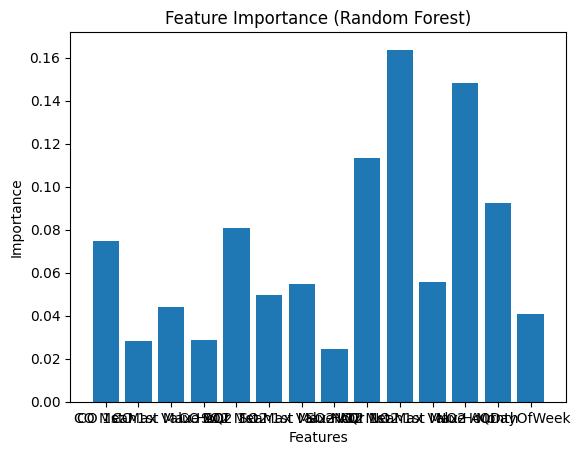

In [ ]:
# Step 2: Target Variable Definition (Define pollution severity categories)
# Composite AQI: Take the maximum AQI across all pollutants for each row
aqi_columns = [col for col in data.columns if 'AQI' in col]
data['Max_AQI'] = data[aqi_columns].max(axis=1)

def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Moderate"
    elif 101 <= aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    else:
        return "Unhealthy"

data['Pollution_Severity'] = data['Max_AQI'].apply(categorize_aqi)

# Step 3: Feature Engineering (Generate additional features)
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek

# Select features and target variable
pollutant_features = [col for col in data.columns if any(pollutant in col for pollutant in ['Ozone', 'SO2', 'NO2', 'CO'])]
features = pollutant_features + ['Month', 'DayOfWeek']
target = 'Pollution_Severity'

X = data[features]
y = data[target]

# Encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Model Training (Random Forest and Logistic Regression)
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Step 5: Evaluation
print("Random Forest Performance")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

print("\nLogistic Regression Performance")
print(classification_report(y_test, lr_predictions, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

# Step 6: Feature Importance (for Random Forest)
import matplotlib.pyplot as plt
feature_importance = rf_model.feature_importances_
plt.bar(features, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
data.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Max_AQI,Pollution_Severity,Month,DayOfWeek
0,880,2000-01-01,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.019412,0.029,13,27,...,9,3.0,14.782609,26.0,4,25,27.0,Good,1,5
1,881,2000-01-02,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.017471,0.032,9,30,...,5,3.0,16.043478,30.0,21,28,30.0,Good,1,6
2,882,2000-01-03,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.006353,0.014,8,13,...,13,6.0,25.521739,40.0,17,38,38.0,Good,1,0
3,883,2000-01-04,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.008176,0.011,13,10,...,17,6.0,26.041667,44.0,17,42,42.0,Good,1,1
4,884,2000-01-05,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,0.012412,0.022,8,20,...,10,6.0,23.772727,38.0,17,36,36.0,Good,1,2


In [ ]:
data.tail()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Max_AQI,Pollution_Severity,Month,DayOfWeek
201239,653833,2023-07-27,304 TUOLUMNE ST.,California,Solano,Vallejo,0.022412,0.025,10,23,...,11,0.0,2.586364,3.6,6,3,23.0,Good,7,3
201240,653834,2023-07-28,304 TUOLUMNE ST.,California,Solano,Vallejo,0.022235,0.027,10,25,...,15,0.0,3.213636,7.7,5,7,25.0,Good,7,4
201241,653835,2023-07-29,304 TUOLUMNE ST.,California,Solano,Vallejo,0.021059,0.027,10,25,...,9,0.0,2.659091,6.1,21,6,25.0,Good,7,5
201242,653836,2023-07-30,304 TUOLUMNE ST.,California,Solano,Vallejo,0.021588,0.028,10,26,...,9,0.0,2.809091,4.5,19,4,26.0,Good,7,6
201243,653837,2023-07-31,304 TUOLUMNE ST.,California,Solano,Vallejo,0.021583,0.023,8,21,...,7,0.0,2.804545,5.9,6,5,21.0,Good,7,0


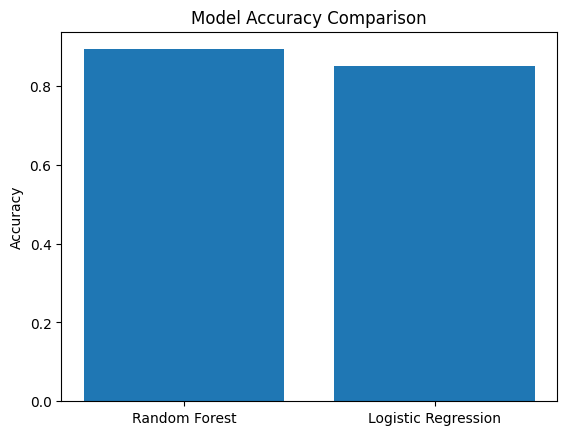

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for Random Forest and Logistic Regression
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Plotting
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

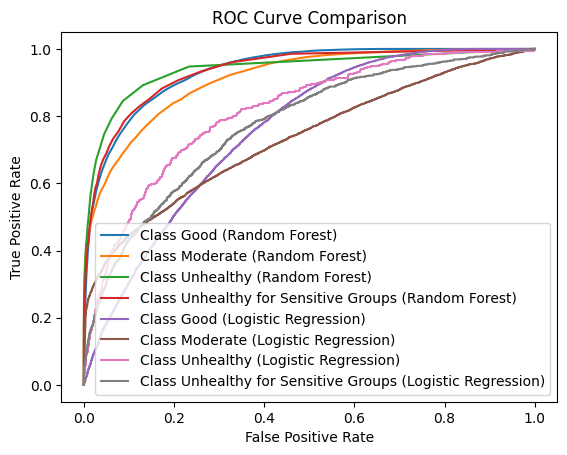

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=list(range(len(label_encoder.classes_))))

# Compute ROC curves for Random Forest
rf_probabilities = rf_model.predict_proba(X_test)
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], rf_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (Random Forest)")

# Compute ROC curves for Logistic Regression
lr_probabilities = lr_model.predict_proba(X_test)
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], lr_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (Logistic Regression)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Combine metrics into a table
summary_table = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lr_accuracy],
    'Precision (Avg)': [rf_metrics[0].mean(), lr_metrics[0].mean()],
    'Recall (Avg)': [rf_metrics[1].mean(), lr_metrics[1].mean()],
    'F1-Score (Avg)': [rf_metrics[2].mean(), lr_metrics[2].mean()]
})

print(summary_table)

NameError: name 'rf_metrics' is not defined

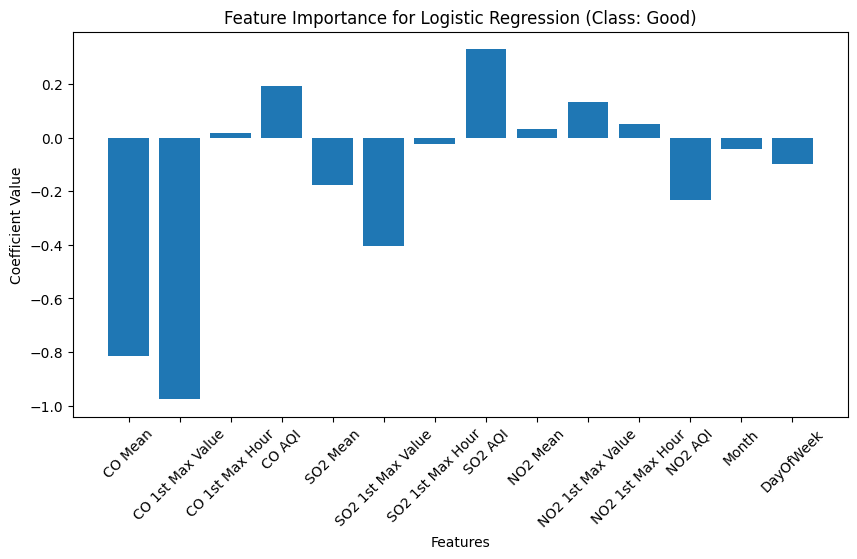

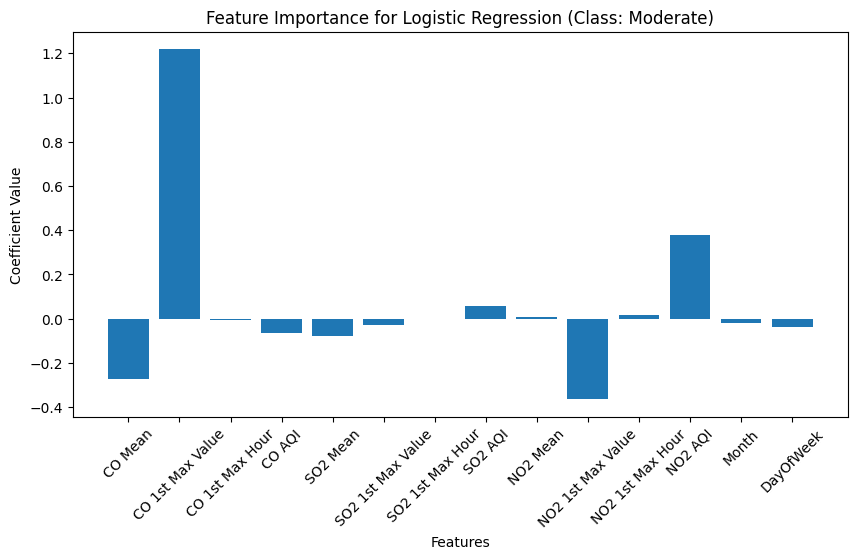

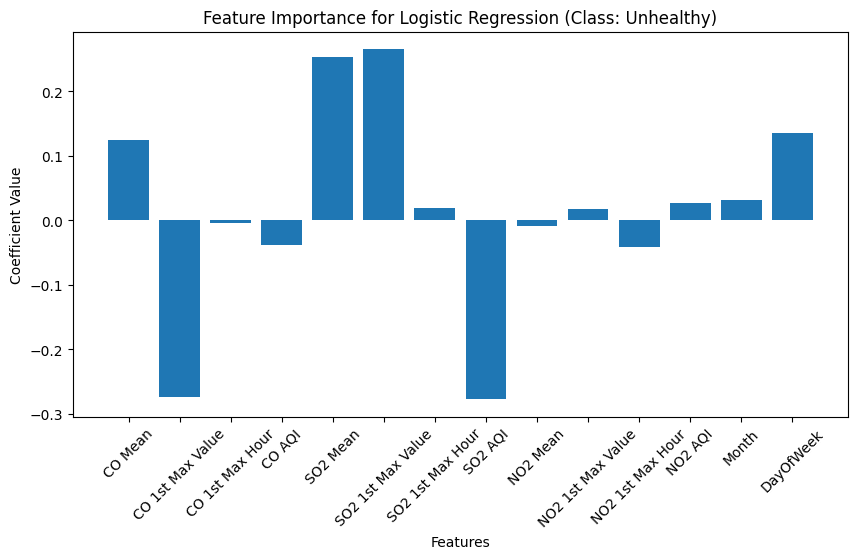

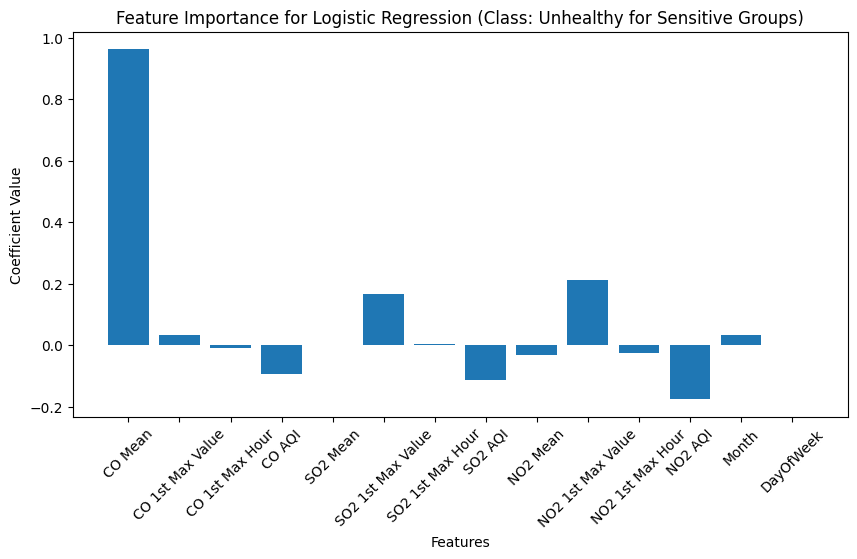

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importance (coefficients) from the Logistic Regression model
coefficients = lr_model.coef_

# Since it's a multi-class problem, we have one set of coefficients for each class
# We'll plot coefficients for each class separately
for i, class_name in enumerate(label_encoder.classes_):
    plt.figure(figsize=(10, 5))
    plt.bar(features, coefficients[i])
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.title(f"Feature Importance for Logistic Regression (Class: {class_name})")
    plt.xticks(rotation=45)
    plt.show()

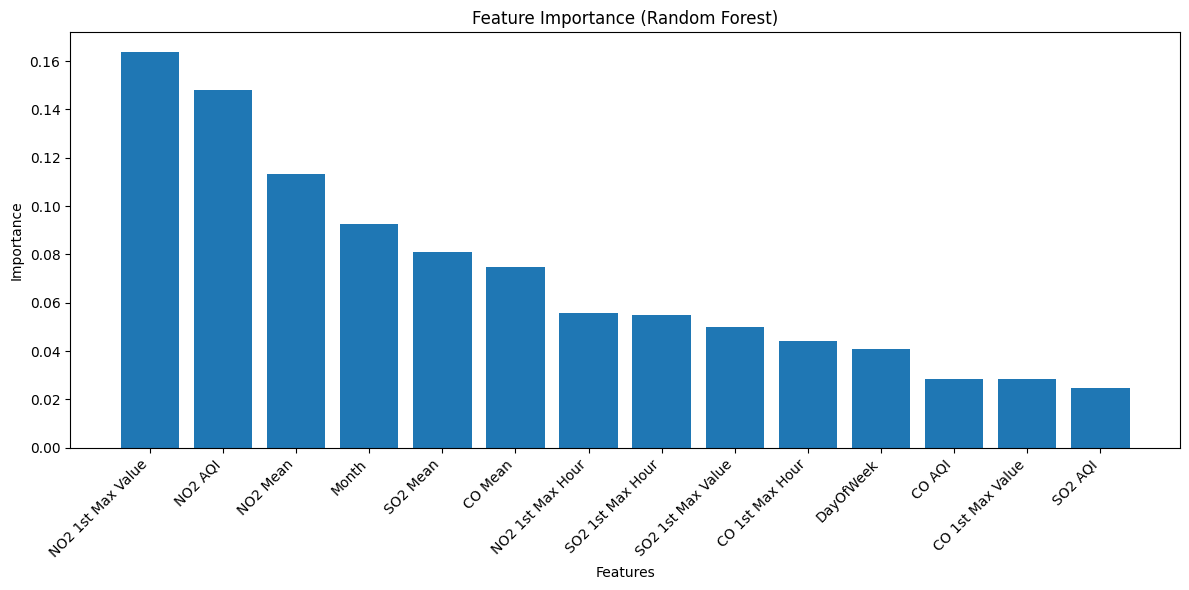

In [ ]:
# Extract feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Sort features by importance for better visualization
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,  # Suppresses warnings for label encoding
    eval_metric='mlogloss',  # Required for multi-class classification
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Step 3: Evaluate the XGBoost Model
print("XGBoost Performance")
print(classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance
                                precision    recall  f1-score   support

                          Good       0.90      0.99      0.94     33104
                      Moderate       0.76      0.45      0.56      5471
                     Unhealthy       0.62      0.20      0.30       362
Unhealthy for Sensitive Groups       0.59      0.24      0.34      1312

                      accuracy                           0.88     40249
                     macro avg       0.72      0.47      0.54     40249
                  weighted avg       0.87      0.88      0.86     40249

Accuracy: 0.8830529951054684


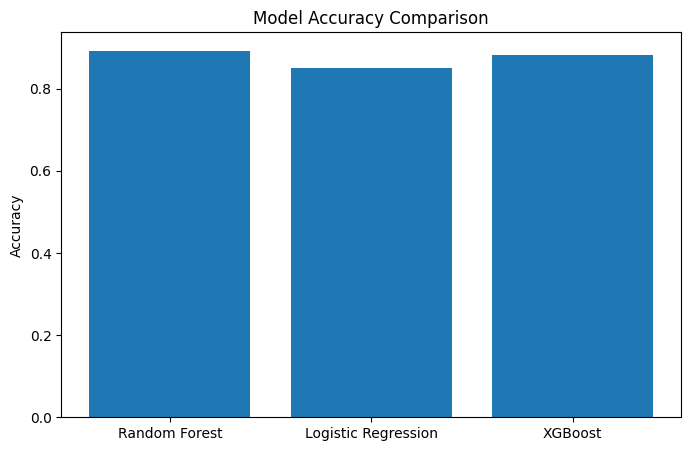

In [ ]:
# Accuracy scores for all models
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [rf_accuracy, lr_accuracy, xgb_accuracy]

# Bar chart for model comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

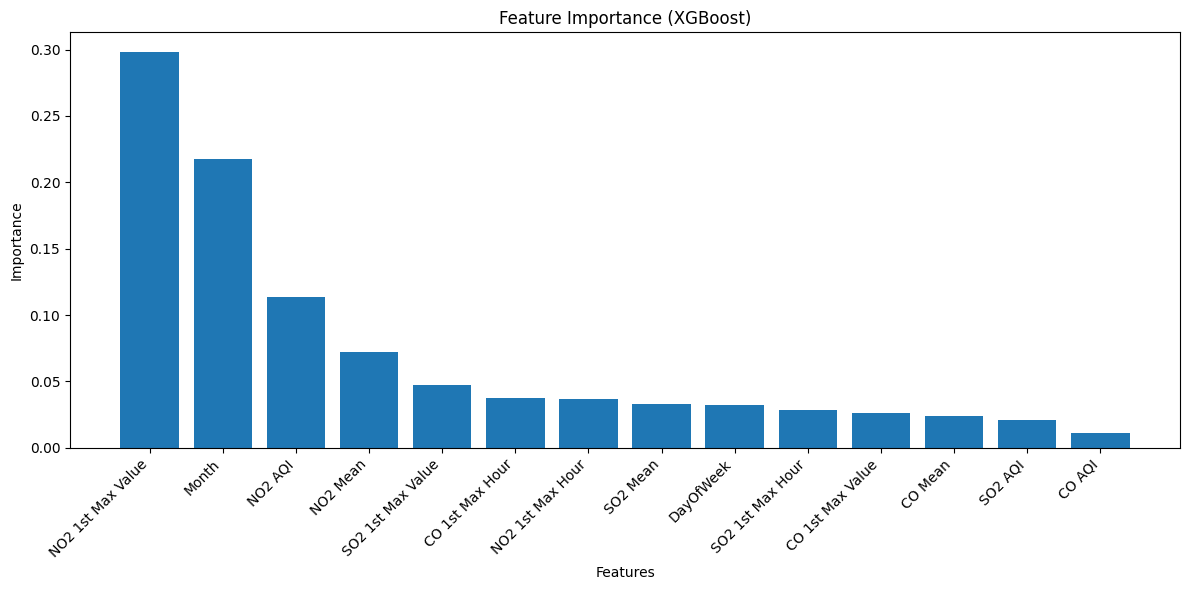

In [ ]:
# Extract and plot feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_

sorted_indices = np.argsort(xgb_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = xgb_importance[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (XGBoost)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

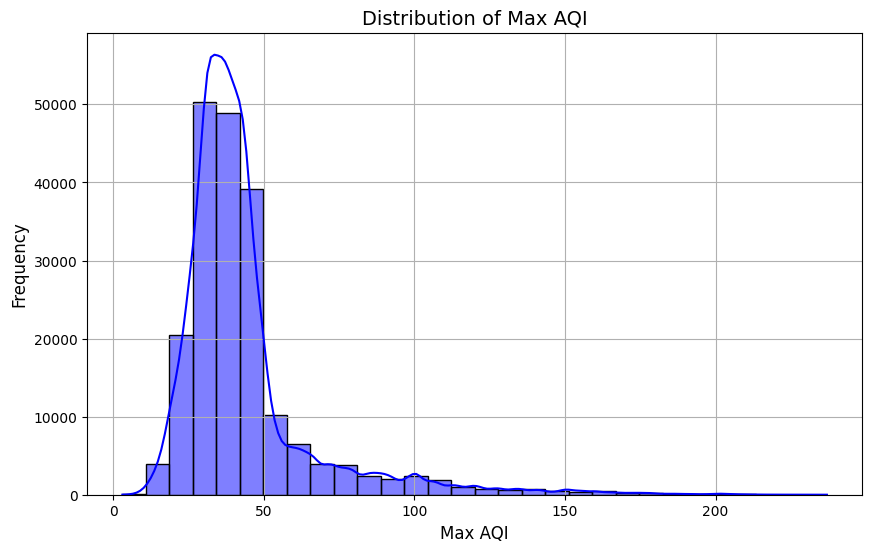

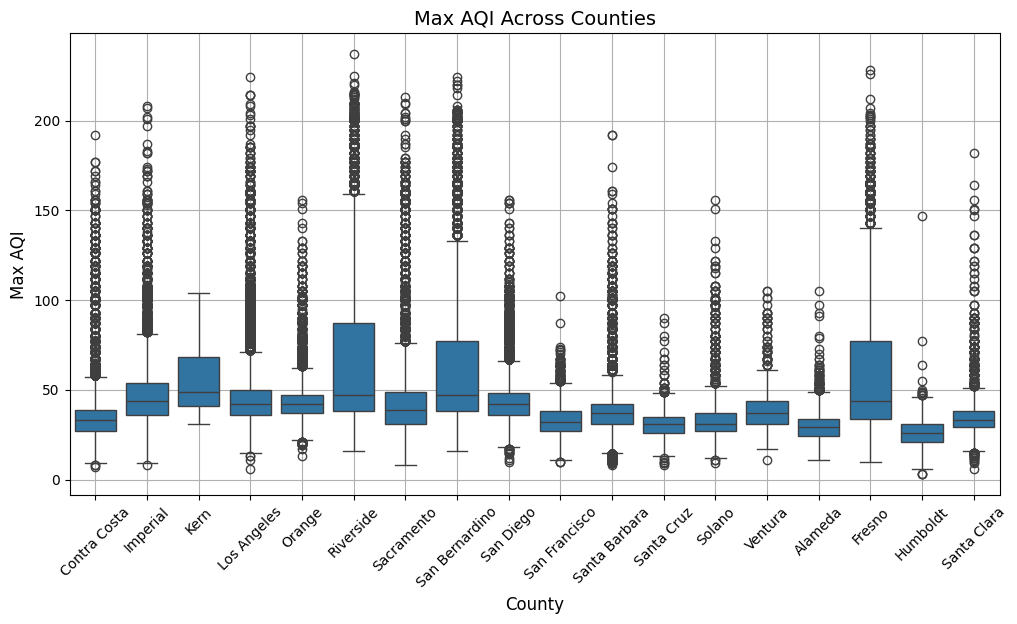

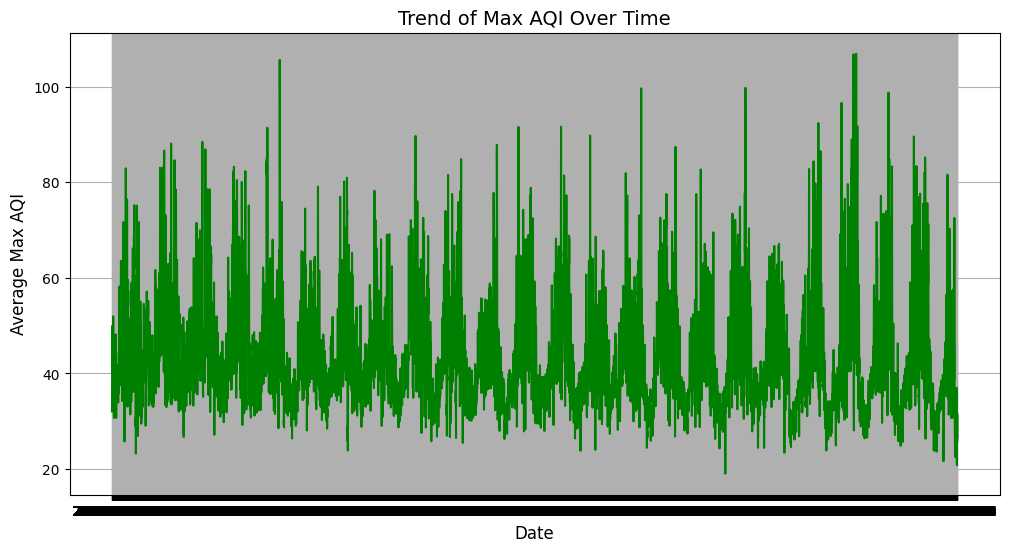

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the 'max_aqi' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Max_AQI'], kde=True, bins=30, color='blue')
plt.title('Distribution of Max AQI', fontsize=14)
plt.xlabel('Max AQI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Boxplot of 'max_aqi' across counties
plt.figure(figsize=(12, 6))
sns.boxplot(x='County', y='Max_AQI', data=data)
plt.title('Max AQI Across Counties', fontsize=14)
plt.xlabel('County', fontsize=12)
plt.ylabel('Max AQI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Trend of 'max_aqi' over time
data_grouped_by_date_aqi = data.groupby('Date')['Max_AQI'].mean()
plt.figure(figsize=(12, 6))
plt.plot(data_grouped_by_date_aqi.index, data_grouped_by_date_aqi, color='green')
plt.title('Trend of Max AQI Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Max AQI', fontsize=12)
plt.grid(True)
plt.show()

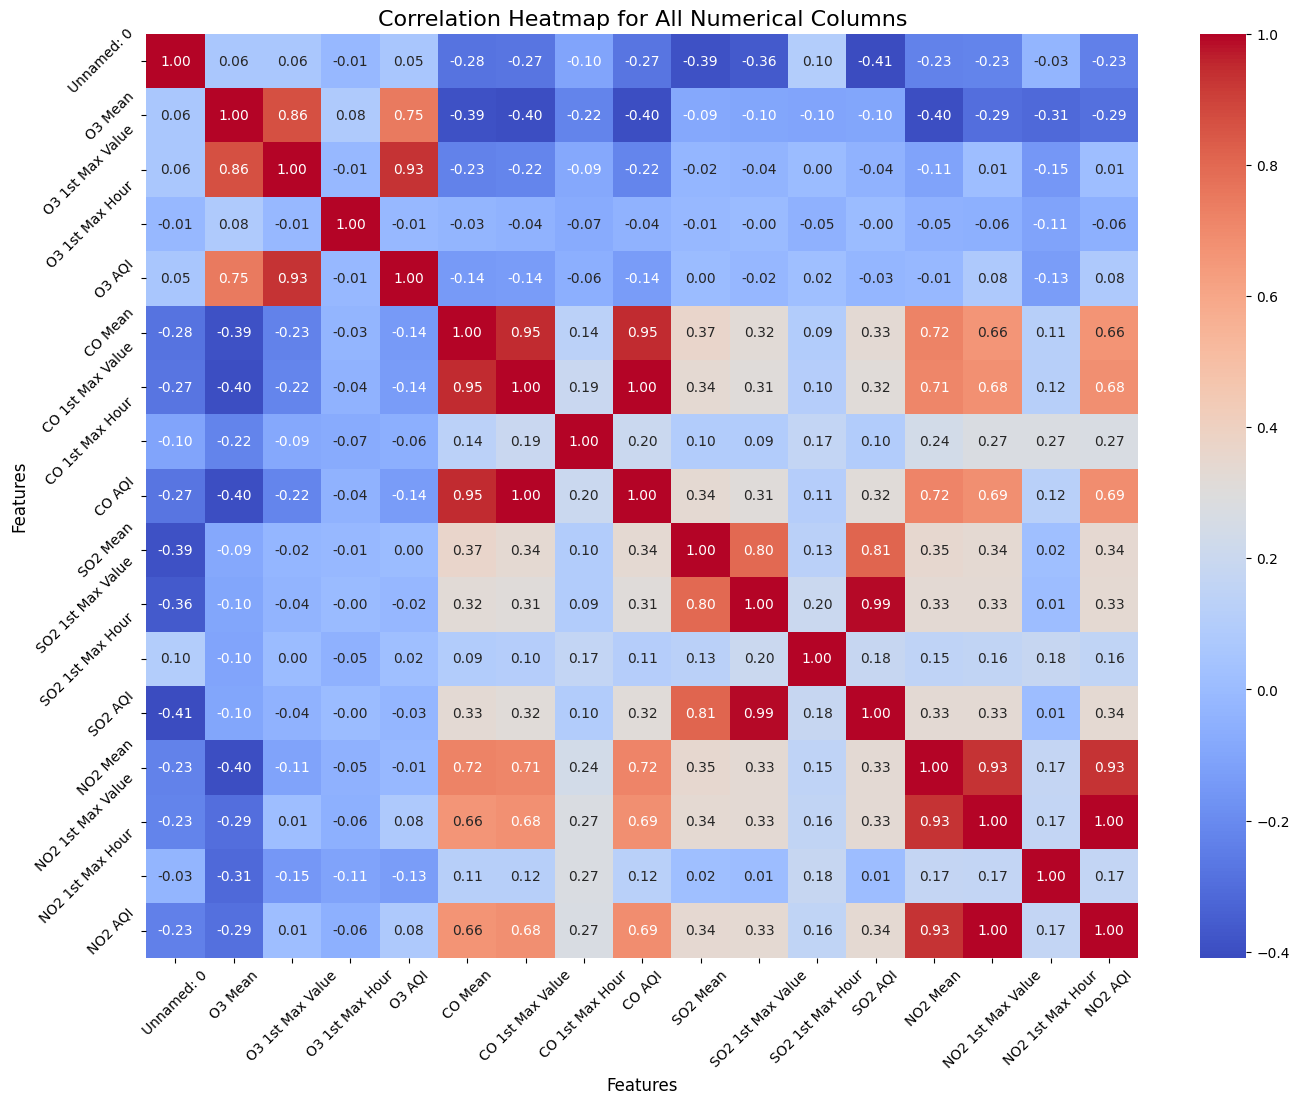

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap for All Numerical Columns', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()